In [257]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt

In [258]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')

In [259]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [260]:
df['good'] = (df.quality > 7).astype(int)

In [261]:
df.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,0
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,0


In [262]:
df.groupby('good').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
good,,,,,,,,,,,,
0,6.861520,0.278251,0.334421,6.420528,0.046068,35.257736,138.836689,0.994097,3.187011,0.490006,10.470894,5.795888
1,6.678333,0.277972,0.328167,5.628333,0.038011,36.627778,125.883333,0.992214,3.221167,0.485667,11.651111,8.027778


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


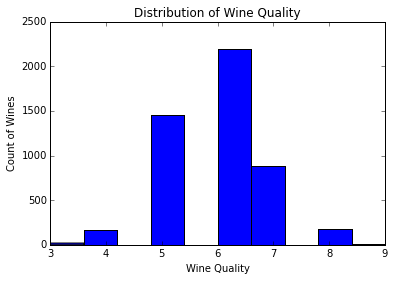

In [263]:
%pylab inline

plt.hist(df.quality)
plt.title("Distribution of Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Count of Wines")

In [264]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
quality,,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000,0
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454,0
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840,0
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372,0
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936,0
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000,1
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000,1


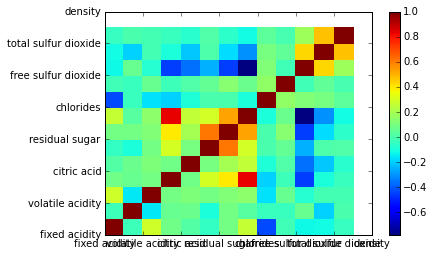

In [265]:
cov_mat = df.corr(method='pearson')
 
fig = plt.figure().add_subplot(111)
 
plt.pcolor(cov_mat)
plt.colorbar()
fig.set_xticklabels(df.columns)
fig.set_yticklabels(df.columns)
plt.show()

In [266]:
#cols_to_keep = ['fixed acidity', 'alcohol','residual sugar','free sulfur dioxide','total sulfur dioxide','good']
#data = df[cols_to_keep]
################
data = df

In [267]:
data.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,0


In [268]:
#msk = np.random.rand(len(data)) < 0.8
#train = data[msk]
#test = data[~msk]
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates', 'alcohol']
x = data[cols]
y = data.good.values

In [269]:
x.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9


In [270]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [271]:
#len(train)
#len(test)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [272]:
x_train
x_test
y_train
y_test
print len(x_train)
print len(x_test)

3428
1470


In [273]:
from sklearn import svm

In [274]:
clf = svm.SVC()

In [275]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [276]:
clf = svm.SVC(kernel= 'linear')

In [25]:
predicted = clf.predict(x_test)

AttributeError: 'SVC' object has no attribute '_sparse'

In [277]:
print metrics.accuracy_score(y_test, predicted)

NameError: name 'predicted' is not defined

In [278]:
#print metrics.roc_auc_score(y_test, predicted)

In [305]:
# Using SGD Classifier_hingeloss_24_L0

clf1 = SGDClassifier(loss="hinge", alpha=0.01, n_iter=24, fit_intercept=True,penalty='none')
clf1.fit(x_train, y_train)
predicted1 = clf1.predict(x_test)
print metrics.accuracy_score(y_test, predicted1)
print metrics.confusion_matrix(y_test,predicted1)

0.963945578231
[[1417    5]
 [  48    0]]


In [318]:
# Using SGD Classifier_hingeloss_20_L0

clf1 = SGDClassifier(loss="hinge", alpha=0.01, n_iter=20, fit_intercept=True,penalty='none')
clf1.fit(x_train, y_train)
predicted1 = clf1.predict(x_test)
print metrics.accuracy_score(y_test, predicted1)
print metrics.confusion_matrix(y_test,predicted1)

0.959183673469
[[1410   12]
 [  48    0]]


In [324]:
# Using SGD Classifier_hingeloss_40_L0

clf1 = SGDClassifier(loss="hinge", alpha=0.01, n_iter=40, fit_intercept=True,penalty='none')
clf1.fit(x_train, y_train)
predicted1 = clf1.predict(x_test)
print metrics.accuracy_score(y_test, predicted1)
print metrics.confusion_matrix(y_test,predicted1)

0.965306122449
[[1419    3]
 [  48    0]]


In [331]:
# Using SGD Classifier_hingeloss_24_L1

clf1 = SGDClassifier(loss="hinge", alpha=0.01, n_iter=24, l1_ratio=1, fit_intercept=True,penalty='l1')
clf1.fit(x_train, y_train)
predicted1 = clf1.predict(x_test)
print metrics.accuracy_score(y_test, predicted1)
print metrics.confusion_matrix(y_test,predicted1)

0.957142857143
[[1407   15]
 [  48    0]]


In [332]:
# Using SGD Classifier_hingeloss_20_L1

clf1 = SGDClassifier(loss="hinge", alpha=0.01, n_iter=20, l1_ratio=1, fit_intercept=True,penalty='l1')
clf1.fit(x_train, y_train)
predicted1 = clf1.predict(x_test)
print metrics.accuracy_score(y_test, predicted1)
print metrics.confusion_matrix(y_test,predicted1)

0.957823129252
[[1408   14]
 [  48    0]]


In [330]:
# Using SGD Classifier_hingeloss_40_L1

clf1 = SGDClassifier(loss="hinge", alpha=0.01, n_iter=40, l1_ratio=1, fit_intercept=True,penalty='l1')
clf1.fit(x_train, y_train)
predicted1 = clf1.predict(x_test)
print metrics.accuracy_score(y_test, predicted1)
print metrics.confusion_matrix(y_test,predicted1)

0.962585034014
[[1415    7]
 [  48    0]]


In [333]:
# Using SGD Classifier_hingeloss_40_L2

clf1 = SGDClassifier(loss="hinge", alpha=0.01, n_iter=40, fit_intercept=True,penalty='l2')
clf1.fit(x_train, y_train)
predicted1 = clf1.predict(x_test)
print metrics.accuracy_score(y_test, predicted1)
print metrics.confusion_matrix(y_test,predicted1)

0.957142857143
[[1406   16]
 [  47    1]]


In [334]:
# Using SGD Classifier_hingeloss_24_L2

clf1 = SGDClassifier(loss="hinge", alpha=0.01, n_iter=24, fit_intercept=True,penalty='l2')
clf1.fit(x_train, y_train)
predicted1 = clf1.predict(x_test)
print metrics.accuracy_score(y_test, predicted1)
print metrics.confusion_matrix(y_test,predicted1)

0.965986394558
[[1420    2]
 [  48    0]]


In [335]:
# Using SGD Classifier_hingeloss_20_L2

clf1 = SGDClassifier(loss="hinge", alpha=0.01, n_iter=20, fit_intercept=True,penalty='l2')
clf1.fit(x_train, y_train)
predicted1 = clf1.predict(x_test)
print metrics.accuracy_score(y_test, predicted1)
print metrics.confusion_matrix(y_test,predicted1)

0.955782312925
[[1402   20]
 [  45    3]]


In [336]:
# Using SGD Classifier_log_24_none

clf3 = SGDClassifier(loss="log", alpha=0.01, n_iter=24, fit_intercept=True, penalty='none')
clf3.fit(x_train, y_train)
predicted3 = clf3.predict(x_test)
print metrics.accuracy_score(y_test, predicted3)
print metrics.confusion_matrix(y_test,predicted3)

0.950340136054
[[1394   28]
 [  45    3]]


In [337]:
# Using SGD Classifier_log_20_none

clf3 = SGDClassifier(loss="log", alpha=0.01, n_iter=20, fit_intercept=True, penalty='none')
clf3.fit(x_train, y_train)
predicted3 = clf3.predict(x_test)
print metrics.accuracy_score(y_test, predicted3)
print metrics.confusion_matrix(y_test,predicted3)

0.937414965986
[[1373   49]
 [  43    5]]


In [338]:
# Using SGD Classifier_log_40_none

clf3 = SGDClassifier(loss="log", alpha=0.01, n_iter=40, fit_intercept=True, penalty='none')
clf3.fit(x_train, y_train)
predicted3 = clf3.predict(x_test)
print metrics.accuracy_score(y_test, predicted3)
print metrics.confusion_matrix(y_test,predicted3)

0.944897959184
[[1386   36]
 [  45    3]]


In [339]:
# Using SGD Classifier_log_24_L1

clf4 = SGDClassifier(loss="log", alpha=0.01, n_iter=24, fit_intercept=True,penalty='l1')
clf4.fit(x_train, y_train)
predicted4 = clf4.predict(x_test)
print metrics.accuracy_score(y_test, predicted4)
print metrics.confusion_matrix(y_test,predicted4)

0.959863945578
[[1411   11]
 [  48    0]]


In [340]:
# Using SGD Classifier_log_20_L1

clf4 = SGDClassifier(loss="log", alpha=0.01, n_iter=20, fit_intercept=True,penalty='l1')
clf4.fit(x_train, y_train)
predicted4 = clf4.predict(x_test)
print metrics.accuracy_score(y_test, predicted4)
print metrics.confusion_matrix(y_test,predicted4)

0.965986394558
[[1420    2]
 [  48    0]]


In [341]:
# Using SGD Classifier_log_40_L1

clf4 = SGDClassifier(loss="log", alpha=0.01, n_iter=40, fit_intercept=True,penalty='l1')
clf4.fit(x_train, y_train)
predicted4 = clf4.predict(x_test)
print metrics.accuracy_score(y_test, predicted4)
print metrics.confusion_matrix(y_test,predicted4)

0.963265306122
[[1416    6]
 [  48    0]]


In [342]:
# Using SGD Classifier_log_24_L2

clf4 = SGDClassifier(loss="log", alpha=0.01, n_iter=24, fit_intercept=True,penalty='l2')
clf4.fit(x_train, y_train)
predicted4 = clf4.predict(x_test)
print metrics.accuracy_score(y_test, predicted4)
print metrics.confusion_matrix(y_test,predicted4)

0.959183673469
[[1409   13]
 [  47    1]]


In [343]:
# Using SGD Classifier_log_20_L2

clf4 = SGDClassifier(loss="log", alpha=0.01, n_iter=20, fit_intercept=True,penalty='l2')
clf4.fit(x_train, y_train)
predicted4 = clf4.predict(x_test)
print metrics.accuracy_score(y_test, predicted4)
print metrics.confusion_matrix(y_test,predicted4)

0.958503401361
[[1408   14]
 [  47    1]]


In [344]:
# Using SGD Classifier_log_40_L2

clf4 = SGDClassifier(loss="log", alpha=0.01, n_iter=40, fit_intercept=True,penalty='l2')
clf4.fit(x_train, y_train)
predicted4 = clf4.predict(x_test)
print metrics.accuracy_score(y_test, predicted4)
print metrics.confusion_matrix(y_test,predicted4)

0.961904761905
[[1414    8]
 [  48    0]]


In [34]:
##################################################

In [345]:
# Using LogisticRegression_l1
clf6 = LogisticRegression(penalty='l1',dual=False,tol=0.01)
clf6.fit(x_train, y_train)
predicted6 = clf6.predict(x_test)
predicted6
print metrics.accuracy_score(y_test, predicted6)
print metrics.confusion_matrix(y_test,predicted6)

0.967346938776
[[1422    0]
 [  48    0]]


In [ ]:
# Using LogisticRegression_l1
clf6 = LogisticRegression(penalty='l1',dual=False,tol=0.01)
clf6.fit(x_train, y_train)
predicted6 = clf6.predict(x_test)
predicted6
print metrics.accuracy_score(y_test, predicted6)
print metrics.confusion_matrix(y_test,predicted6)

In [ ]:
# Using LogisticRegression_l1
clf6 = LogisticRegression(penalty='l1',dual=False,tol=0.01)
clf6.fit(x_train, y_train)
predicted6 = clf6.predict(x_test)
predicted6
print metrics.accuracy_score(y_test, predicted6)
print metrics.confusion_matrix(y_test,predicted6)

In [346]:
# Using LogisticRegression_l2
clf7 = LogisticRegression(penalty='l2',dual=True,tol=0.01)
clf7.fit(x_train, y_train)
predicted7 = clf7.predict(x_test)
predicted7
print metrics.accuracy_score(y_test, predicted7)
print metrics.confusion_matrix(y_test,predicted7)

0.967346938776
[[1422    0]
 [  48    0]]


In [ ]:
# Using LogisticRegression_l2
clf7 = LogisticRegression(penalty='l2',dual=True,tol=0.01)
clf7.fit(x_train, y_train)
predicted7 = clf7.predict(x_test)
predicted7
print metrics.accuracy_score(y_test, predicted7)
print metrics.confusion_matrix(y_test,predicted7)

In [ ]:
# Using LogisticRegression_l2
clf7 = LogisticRegression(penalty='l2',dual=True,tol=0.01)
clf7.fit(x_train, y_train)
predicted7 = clf7.predict(x_test)
predicted7
print metrics.accuracy_score(y_test, predicted7)
print metrics.confusion_matrix(y_test,predicted7)